In [13]:
# 1. Import necessary packages
import tensorflow as tf
from keras.models import Sequential
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
# 2. Load Dataset
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
# 3. Split the dataset into traning and testing 
x_train = x_train / 255
x_test = x_test / 255

In [6]:
import keras 
model = Sequential()
from keras import layers

In [7]:
# Define the network Architecture using keras
model.add(layers.Input(shape=(28, 28, 1)))  
model.add(layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Train the model using SGD
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8348 - loss: 0.6558 - val_accuracy: 0.9043 - val_loss: 0.3575
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9068 - loss: 0.3357 - val_accuracy: 0.9199 - val_loss: 0.2890
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9206 - loss: 0.2851 - val_accuracy: 0.9292 - val_loss: 0.2560
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9284 - loss: 0.2543 - val_accuracy: 0.9353 - val_loss: 0.2339
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9346 - loss: 0.2320 - val_accuracy: 0.9396 - val_loss: 0.2154


In [23]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss : %.3f" %test_loss)
print("Accuracy : %.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9396 - loss: 0.2154
Loss : 0.215
Accuracy : 0.940


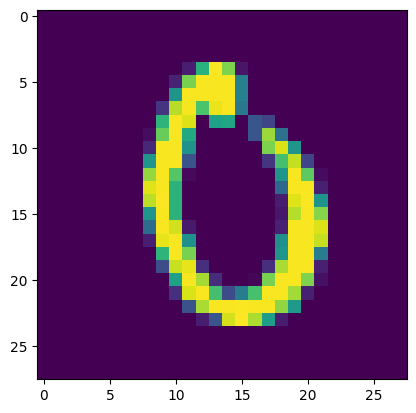

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
handwriiten image is in format 0 


In [14]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
prediction = model.predict(x_test)
print("handwriiten image is in format %d " % np.argmax(prediction[n]))

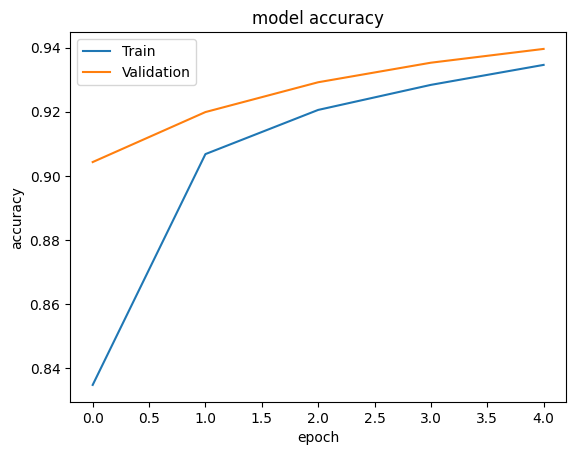

In [19]:
# Plot the Training LOSS and ACCURACY
 #Plotting the training Accuracy

plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

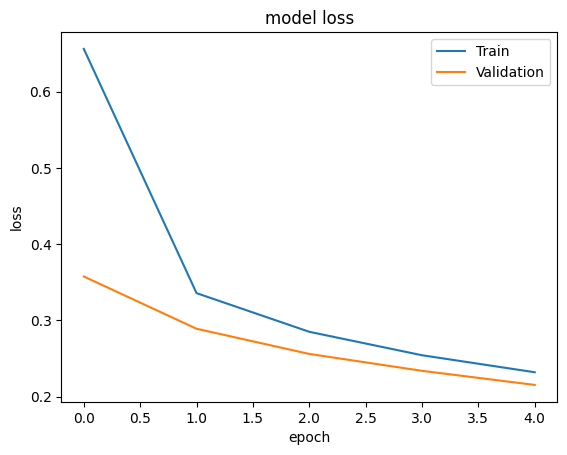

In [21]:
 #Plotting the training LOSS

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# 1. Load the CIFAR-10 dataset

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


In [3]:
# 2️ Normalize the pixel values (0-1)
x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train.shape[0]

50000

In [4]:
# 3️ Flatten the 32x32x3 images to 3072-dimensional vectors
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [5]:
# 4️ One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [6]:
# 5️ Define the Feed Forward Neural Network model

model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(3072,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 6️ Compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# 7️ Train the model

history = model.fit(
    x_train_flat, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_data=(x_test_flat, y_test_cat),
    verbose=1
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 62ms/step - accuracy: 0.3220 - loss: 1.8806 - val_accuracy: 0.3963 - val_loss: 1.7023
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.3975 - loss: 1.6801 - val_accuracy: 0.4057 - val_loss: 1.6630
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.4330 - loss: 1.5868 - val_accuracy: 0.4412 - val_loss: 1.5634
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - accuracy: 0.4540 - loss: 1.5239 - val_accuracy: 0.4467 - val_loss: 1.5452
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.4705 - loss: 1.4809 - val_accuracy: 0.4599 - val_loss: 1.4983
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.4829 - loss: 1.4464 - val_accuracy: 0.4705 - val_loss: 1.4836
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 52ms/step - accuracy: 0.4959 - loss: 1.4079 - val_accuracy: 0.4642 - val_loss: 1.5068
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.5060 - loss: 1.3835 - 

In [13]:
# 8️ Evaluate the model on test data

test_loss, test_acc = model.evaluate(x_test_flat, y_test_cat, verbose=2)
print("Loss : %.3f" %test_loss)
print("Accuracy : %.3f" %test_acc)

313/313 - 2s - 8ms/step - accuracy: 0.5018 - loss: 1.4053
Loss : 1.405
Accuracy : 0.502


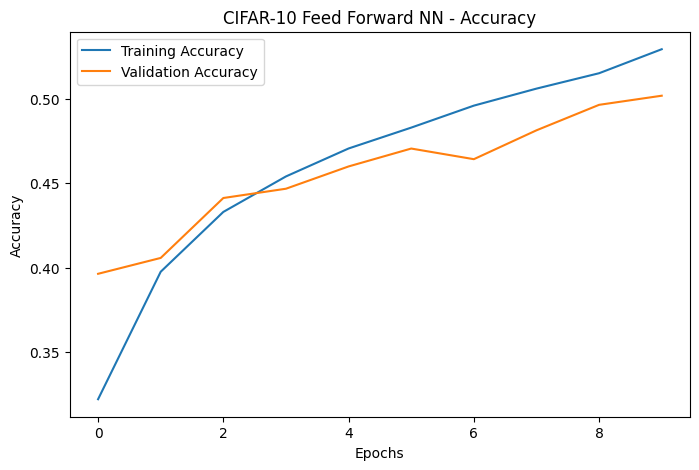

In [11]:
# 9️ Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CIFAR-10 Feed Forward NN - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

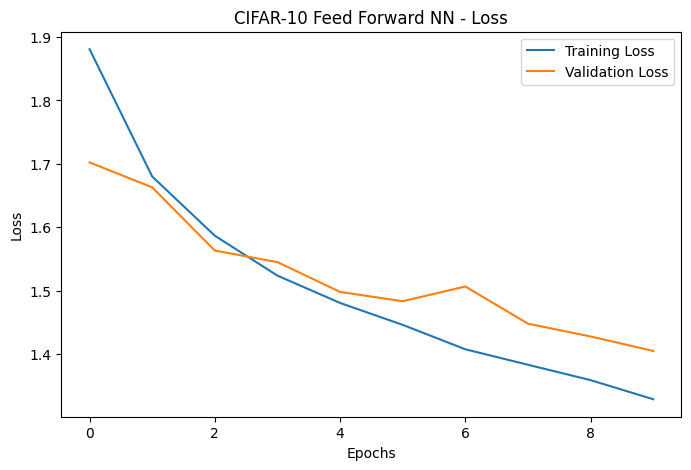

In [12]:
# 10 Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CIFAR-10 Feed Forward NN - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


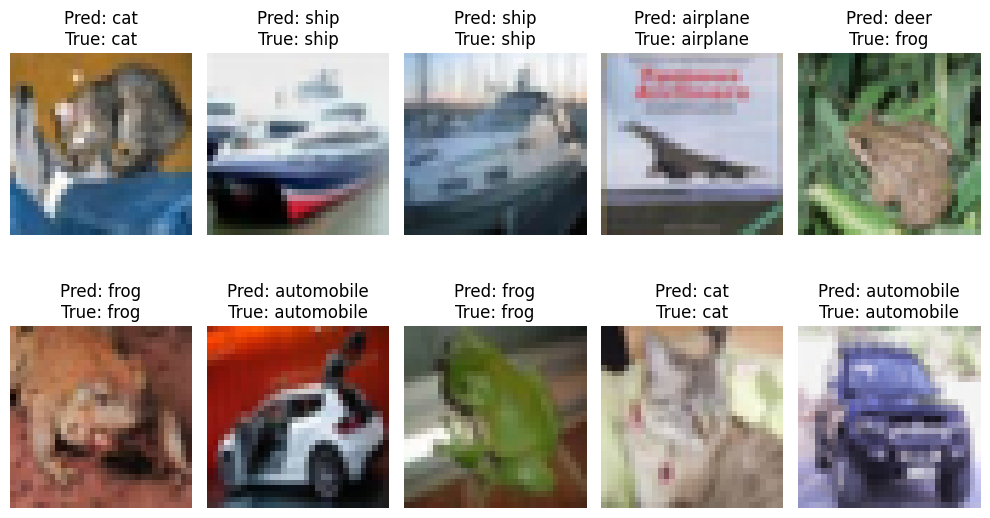

In [10]:
# 11 Display sample predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

predictions = model.predict(x_test_flat)
pred_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[pred_labels[i]]}\nTrue: {class_names[y_test[i][0]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()